
# Object-oriented programming

You've heard that Python is _objected-oriented_, but haven't found a reason to use an object yourself. Here we'll develop an example where designing an object makes life easier.

Let's say you've got a series of 1000 light curves, each of which contain:
* times
* fluxes
* uncertainties
* flags

Instead of managing a bunch of arrays to handle these values, we could instead create an object to store light curves.

<div style="padding-left: 30px;">
<em>Aside</em>: this tutorial will guide you through creating your own Python object to represent a light curve. The code shared here is meant as an incomplete pedagogical tool. If you work with light curves in your research, we encourage you to check out advanced existing packages for accomplishing the tasks demonstrated briefly in this notebook, and much much more, like the <strong>lightkurve</strong> package (<a href="https://docs.lightkurve.org/">docs</a>, <a href="https://github.com/lightkurve/lightkurve">code</a>).
</div>

## Defining a new object

To create a new object, you use the `class` command, rather than the `def` command that you would use for functions,
```python
class LightCurve:

def light_curve()
```
We've named the new object LightCurve - object names in python should be uppercase without underscores separating words (whereas functions are usually all lowercase and words are separated by underscores). The `object` in parentheses is the class that `LightCurve` inherits from.

*Historical Note:* Sometimes you'll see classes defined like this:
```python
class LightCurve(object):
```
this was required in Python 2, but because all modern Python uses Python 3, it's becoming less common. In Python 3 this is exactly equivalent to `class LightCurve:` so you can effectively ignore it.

### The `__init__` method
Now we will define how you call the `LightCurve` constructor (the call that creates new `LightCurve` objects). Let's say you want to be able to create a light curve like this...
```python
new_light_curve = LightCurve(times=times, fluxes=fluxes,
                             uncertainties=uncertainties, flags=flags)
```
All Python objects get initialized with a function called `__init__` defined within the class, like this:
```python
class LightCurve:
    def __init__(self, times=None, fluxes=None, uncertainties=None, flags=None):
```
You define the `__init__` function like all other functions, except that the first argument is always called `self`. This `self` is the shorthand variable that you use to refer to the `LightCurve` object within the `__init__` method.

### Attributes
Objects have _attributes_, which are like variables stored on an object. We'll want to store the values above into the `LightCurve` object, each with their own attribute, like this:
```python
class LightCurve:
    def __init__(self, times=None, fluxes=None, uncertainties=None, flags=None):
        self.times = times
        self.fluxes = fluxes
        self.uncertainties = uncertainties
        self.flags = flags
        
```
Each attribute is defined by setting `self.<attribute name> = <value>`. All attributes should be defined within the `__init__` method.

## Example
Let's now create an instance of the `LightCurve` object, and see how it works:

In [1]:
# Define the object
class LightCurve:
    def __init__(self, times=None, fluxes=None,
                 uncertainties=None, flags=None, name=None):
      self.times = times
      self.fluxes = fluxes
      self.uncertainties = uncertainties
      self.flags = flags
      self.name = name

# Create some fake data
import numpy as np

times = np.linspace(0, 10, 100)
sigma = 0.1
fluxes = 1 + sigma * np.random.randn(len(times))
uncertainties = sigma * np.ones_like(fluxes)
flags = np.random.randint(0, 5, len(fluxes))
name = 'proxima Centauri'

prox_cen = LightCurve(times=times, fluxes=fluxes,
                      uncertainties=uncertainties,
                      flags=flags, name=name)

We can see what values are stored in each attribute like this:

In [2]:
prox_cen.name

'proxima Centauri'

So far this just looks like another way to store your data. It becomes more powerful when you write _methods_ for your object. Let's make a simple plotting method for the `LightCurve` object, which plots the light curve.

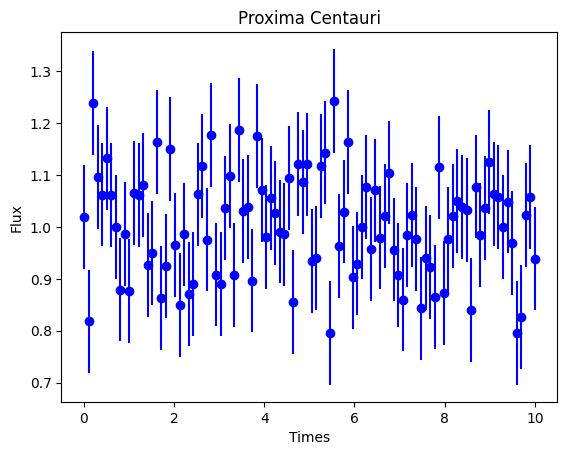

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

# Define the object
class LightCurve:
    def __init__(self, times=None, fluxes=None,
                 uncertainties=None, flags=None, name=None):
      self.times = times
      self.fluxes = fluxes
      self.uncertainties = uncertainties
      self.flags = flags
      self.name = name

    def plot(self, color='black', format='png'):
      plt.errorbar(self.times, self.fluxes, self.uncertainties,
                   fmt='o', color=color)
      plt.xlabel('Times')
      plt.ylabel('Flux')
      plt.title(self.name)
      plt.savefig(f'{self.name}.{format}')

name = 'Proxima Centauri'

# Create an object for Alpha Centauri
prox_cen = LightCurve(times=times, fluxes=fluxes,
                      uncertainties=uncertainties, flags=flags,
                      name=name)

# Plot the light curve of Alpha Centauri
prox_cen.plot(color='blue', format='pdf')



## F-string formatting

In [4]:
# This is the current standard
num = 10
print(f'Print something: {name} and {num}')

Print something: Proxima Centauri and 10


In [5]:
# This works but it is sort of the older version
print('Print something {} and {}'.format(name, num))

Print something Proxima Centauri and 10


Note that you can access the attributes of the object within methods by calling `self.<attribute name>`.

### Class methods

There's more than one way to initialize a light curve. Maybe your light curves come to you in a particular file type, and you want to be able to load those files directly into a light curve object. You could do that with a _class method_, like this:

In [6]:
# Define the object
class LightCurve:
    def __init__(self, times=None, fluxes=None,
                 uncertainties=None, flags=None, name=None):
      self.times = times
      self.fluxes = fluxes
      self.uncertainties = uncertainties
      self.flags = flags
      self.name = name

    def plot(self, format='png'):
      plt.errorbar(self.times, self.fluxes, self.uncertainties,
                   fmt='o', label=f'{self.name}')
      plt.xlabel('Times')
      plt.ylabel('Flux')
      plt.title(self.name)
      plt.legend(loc='upper right')
      plt.show()
      #plt.savefig(f'{self.name}.{format}')

    @classmethod
    def from_txt(cls, path, name):
      data = np.loadtxt(path)

      times = data[0, :]
      fluxes = data[1, :]
      uncertainties = data[2, :]
      flags = data[3, :]
      return cls(times=times, fluxes=fluxes,
                 uncertainties=uncertainties, flags=flags, name=name)

To get sample light curves to load using the new class method, run the cell below:

In [7]:
import os

directory_name = 'sample_lcs'

if not os.path.exists(directory_name):
    os.makedirs(directory_name)

n_lightcurves = 10

for i in range(n_lightcurves):
    times = np.linspace(0, 10, 100)
    sigma = np.random.rand()
    fluxes = (10 + sigma * np.random.randn(len(times)) +
              np.polyval([(0.5 - np.random.rand()), np.random.rand()], (times - 10*np.random.rand())))
    uncertainties = sigma * np.ones_like(fluxes)
    flags = np.random.randint(0, 5, len(fluxes))

    data = [times, fluxes, uncertainties, flags]
    np.savetxt(f'{directory_name}/lc_{i}.txt', data)

We can now load a light curve with the class method like this:

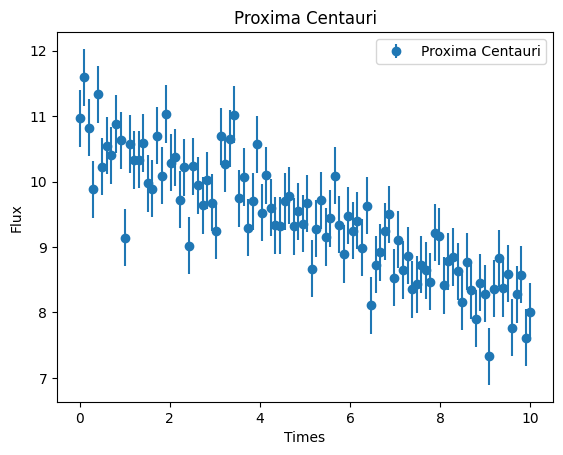

In [8]:
path = 'sample_lcs/lc_0.txt'

lc0 = LightCurve.from_txt(path, 'Proxima Centauri')

lc0.plot()

Now let's compute the mean flux of each target, taking advantage of the object we've created:

In [9]:
from glob import glob

lc_paths = glob('sample_lcs/*.txt')

print(lc_paths)

['sample_lcs/lc_9.txt', 'sample_lcs/lc_6.txt', 'sample_lcs/lc_3.txt', 'sample_lcs/lc_4.txt', 'sample_lcs/lc_0.txt', 'sample_lcs/lc_7.txt', 'sample_lcs/lc_2.txt', 'sample_lcs/lc_8.txt', 'sample_lcs/lc_5.txt', 'sample_lcs/lc_1.txt']


In [12]:
for lightcurve in lightcurves:
  print(lightcurve.fluxes.std())

0.4756265589542735
1.3492883588133124
1.3513488726538632
0.6118246552846677
0.8947668344350083
0.9525646791106024
1.2976010611980586
1.6224606017578682
1.1383022776178355
0.9148975034446393


And let's plot each light curve:

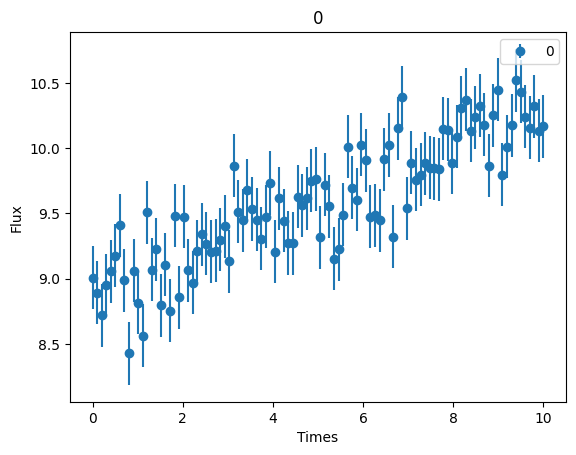

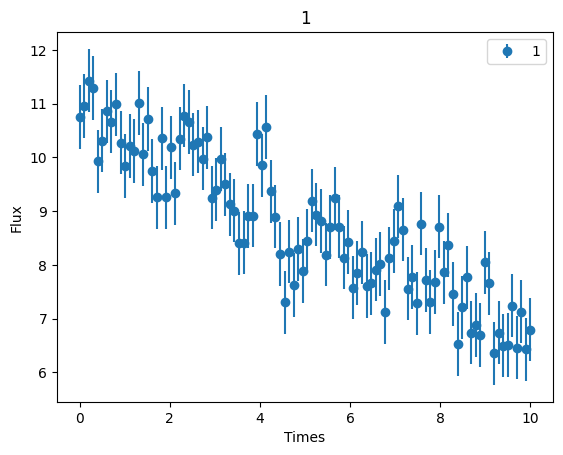

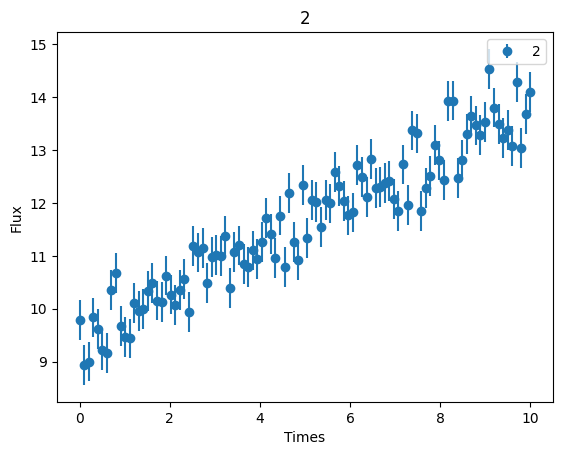

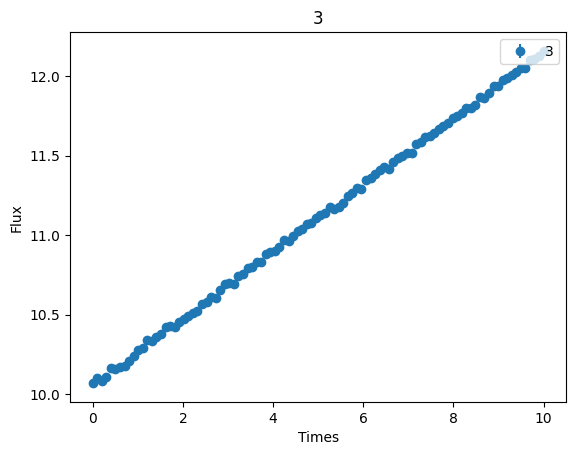

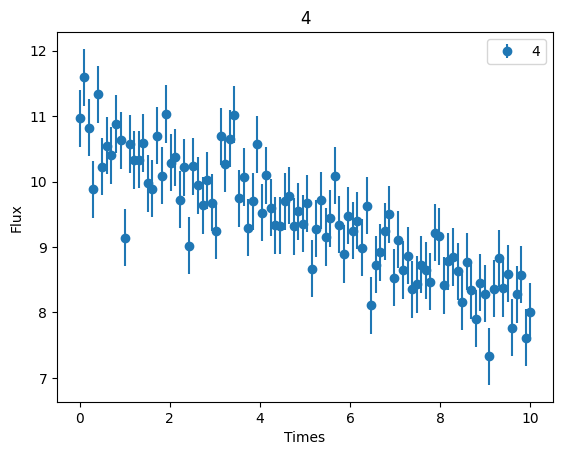

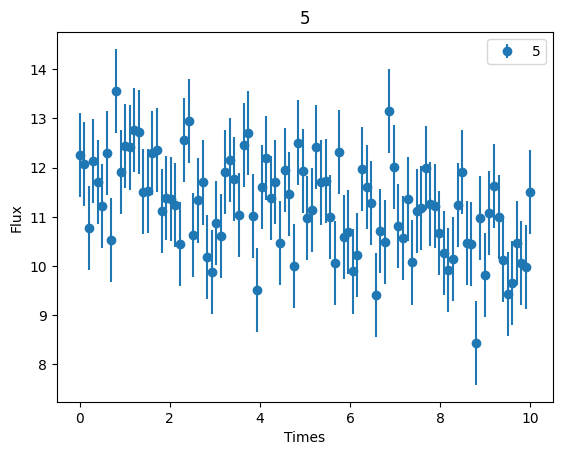

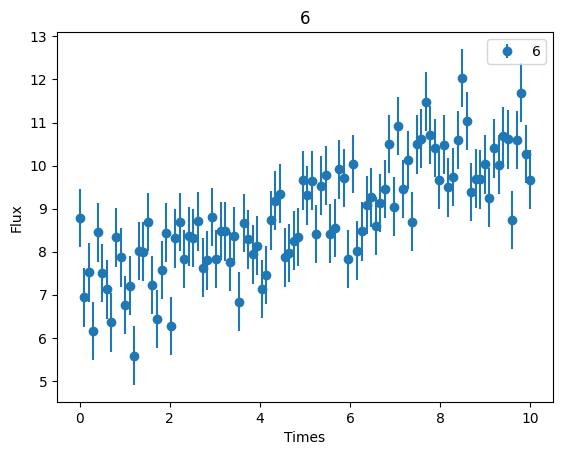

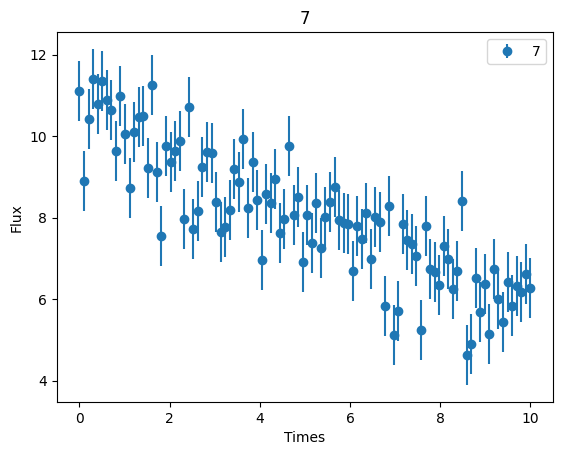

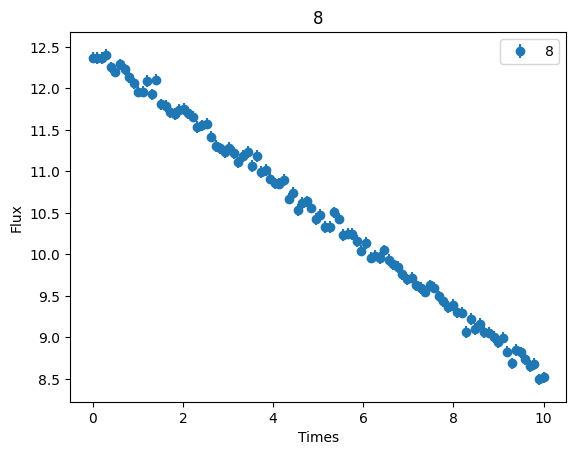

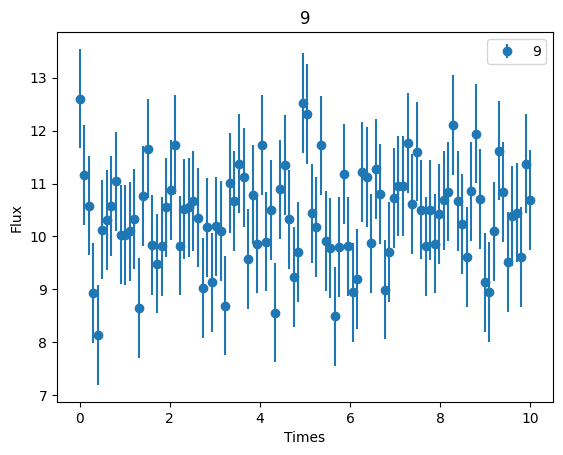

In [13]:
lightcurves = [LightCurve.from_txt(lc_paths[index], index) for index in np.arange(10)]

for lightcurve in lightcurves:
  lightcurve.plot()

### A more useful method

Let's "clean" the light curves by normalizing out a polynomial trend from each one. We'll do this with a new method.

In [14]:
# Define the object
class LightCurve:
    def __init__(self, times=None, fluxes=None,
                 uncertainties=None, flags=None, name=None):
      self.times = times
      self.fluxes = fluxes
      self.uncertainties = uncertainties
      self.flags = flags
      self.name = name

    def plot(self, format='png'):
      plt.errorbar(self.times, self.fluxes, self.uncertainties,
                   fmt='o', label=f'{self.name}')
      plt.xlabel('Times')
      plt.ylabel('Flux')
      plt.title(self.name)
      plt.legend(loc='upper right')
      plt.show()
      #plt.savefig(f'{self.name}.{format}')

    @classmethod
    def from_txt(cls, path, name):
      data = np.loadtxt(path)

      times = data[0, :]
      fluxes = data[1, :]
      uncertainties = data[2, :]
      flags = data[3, :]
      return cls(times=times, fluxes=fluxes,
                 uncertainties=uncertainties, flags=flags, name=name)

    def clean(self, order=1):
      # Fit a polynomial trend to the light curve
      poly_params = np.polyfit(self.times, self.fluxes, order)
      best_fit_model = np.polyval(poly_params, self.times)

      # Normalize each flux by the flux in the best-fit polynomial model
      self.fluxes /= best_fit_model
      self.uncertainties /= best_fit_model

      # Change the "cleaned" attribute to True
      self.cleaned = True



Let's try it on our data:

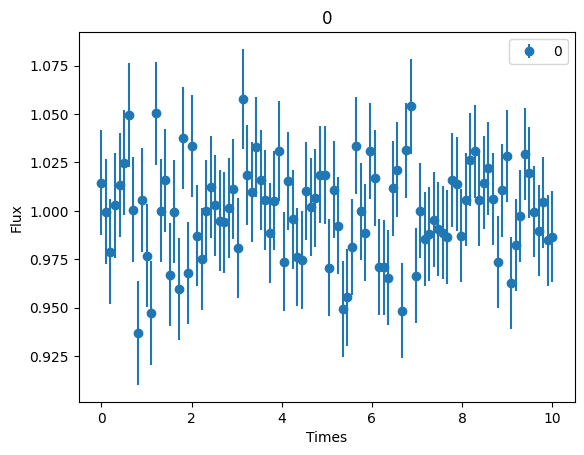

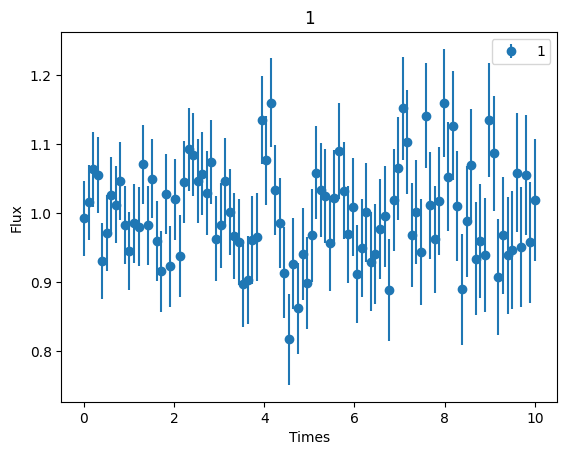

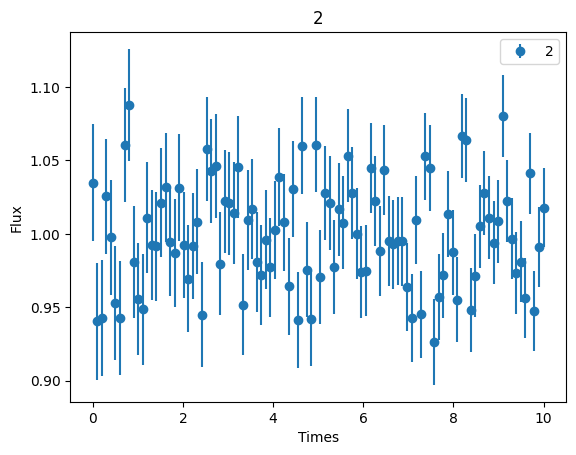

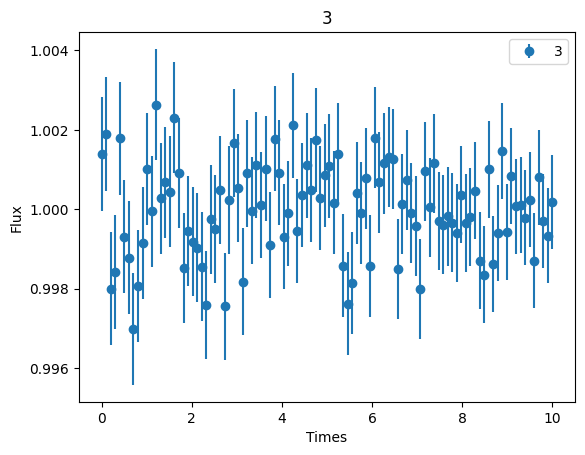

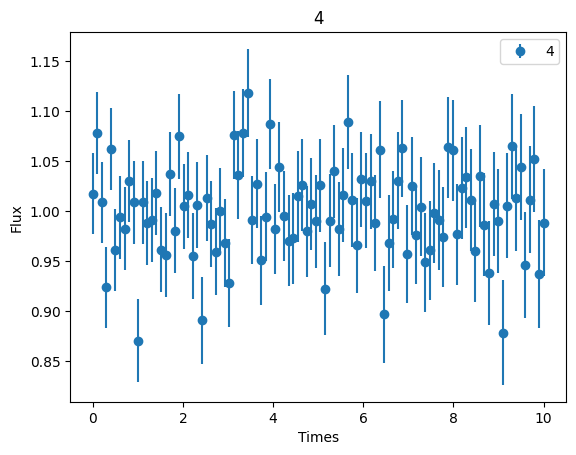

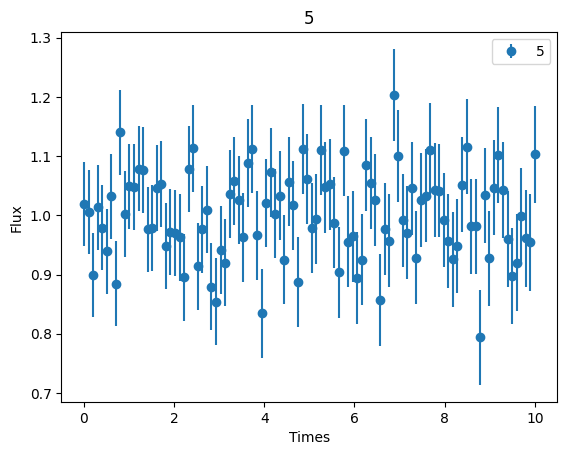

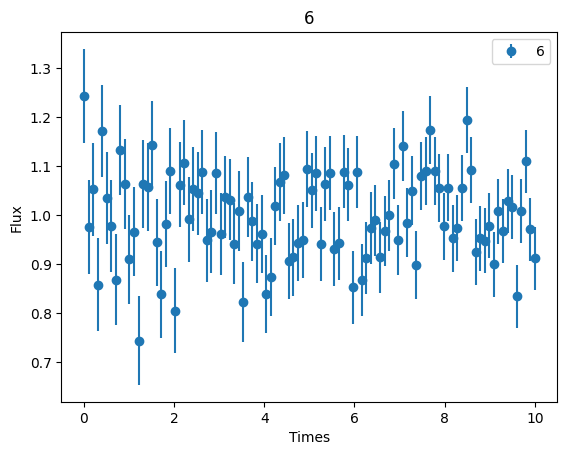

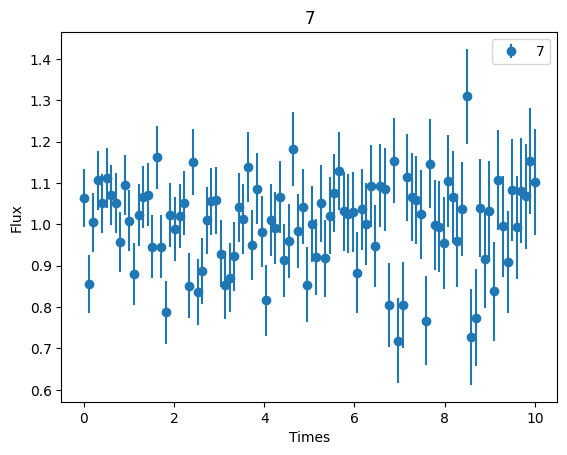

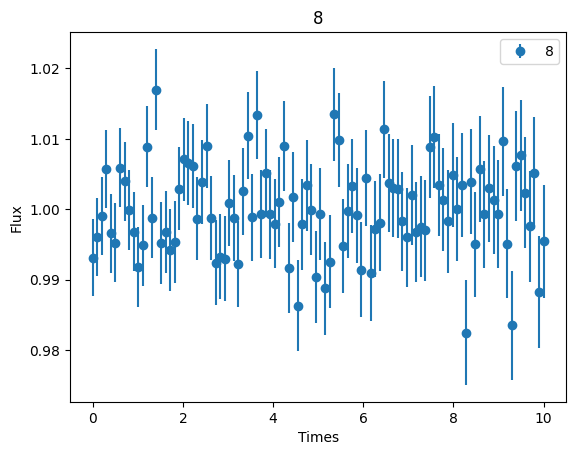

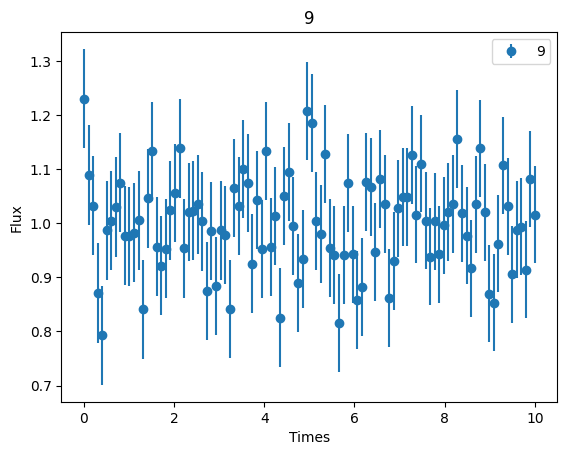

In [15]:
lightcurves = [LightCurve.from_txt(lc_paths[index], index) for index in np.arange(10)]

for lightcurve in lightcurves:
  lightcurve.clean()
  lightcurve.plot()

You can now check to see if a light curve has been cleaned with the cleaned attribute:

In [16]:
lightcurve.cleaned

True

## Documentation

If you want to share your code with collaborators or with your future self, you should include documentation. We've neglected that above, so let's add in some _docstrings_!

There's a top-level docstring for the object, then docstrings for each method on the class. The format of the docstrings we will use here is called [numpydoc](https://github.com/numpy/numpy/blob/main/doc/HOWTO_DOCUMENT.rst.txt).

In [17]:
# Define the object
class LightCurve:
    """Container for astrophysical light curves"""
    def __init__(self, times=None, fluxes=None,
                 uncertainties=None, flags=None, name=None):
      """
      Parameters
      ----------
      times : array-like
          Time of each flux measurement
      fluxes : array-like
          Fluxes at each time
      uncertainties : array-like
          Uncertainties of each flux measurement
      flags : array-like
          Data quality flags for each flux
      name : string
          Name of the target
      """
      self.times = times
      self.fluxes = fluxes
      self.uncertainties = uncertainties
      self.flags = flags
      self.name = name

    def plot(self, format='png'):
      """
      Plot the light curve.
      """
      plt.errorbar(self.times, self.fluxes, self.uncertainties,
                   fmt='o', label=f'{self.name}')
      plt.xlabel('Times')
      plt.ylabel('Flux')
      plt.title(self.name)
      plt.legend(loc='upper right')
      plt.show()
      #plt.savefig(f'file_name_{self.name}.{format}')

    @classmethod
    def from_txt(cls, path, name):
      """
      Load a light curve from a raw text file

      Parameters
      ----------
      path : str
          Path to the light curve text file
      name : str
          Name of the target
      """
      data = np.loadtxt(path)

      times = data[0, :]
      fluxes = data[1, :]
      uncertainties = data[2, :]
      flags = data[3, :]
      return cls(times=times, fluxes=fluxes,
                 uncertainties=uncertainties, flags=flags, name=name)

    def clean(self, order=1):
      """
      Normalize the light curve by a polynomial.

      Parameters
      ----------
      order : int
          Polynomial order
      """
      # Fit a polynomial trend to the light curve
      poly_params = np.polyfit(self.times, self.fluxes, order)
      best_fit_model = np.polyval(poly_params, self.times)

      # Normalize each flux by the flux in the best-fit polynomial model
      self.fluxes /= best_fit_model
      self.uncertainties /= best_fit_model

      # Change the "cleaned" attribute to True
      self.cleaned = True

prox_cen = LightCurve(times=times, fluxes=fluxes,
                      uncertainties=uncertainties, flags=flags,
                      name=name)

Now you can see the documentation on the module within iPython or iPython Notebooks by typing
```
prox_cen?
```
...you can see the documentation for each method by typing
```
prox_cen.clean?
```
and you can see the source code for each method by typing
```
prox_cen.clean??
```

In [18]:
prox_cen.clean??

If you write your docstrings in this format, there are packages that can generate HTML documentation straight from the source code. For example, astropy's `SkyCoord` object has [this docstring in the source](https://github.com/astropy/astropy/blob/0c73d13f6a13237d2e4061b4087a2f42b70d01bc/astropy/coordinates/sky_coordinate.py#L169-L285) which becomes [this webpage](http://docs.astropy.org/en/stable/api/astropy.coordinates.SkyCoord.html).

You can even get free web hosting for your documentation and automatic integration with GitHub via [Read The Docs](https://readthedocs.org).

# SciPy

Now, let's try to add a method that computes the power spectrum of the light curve. We will use **SciPy** for this.

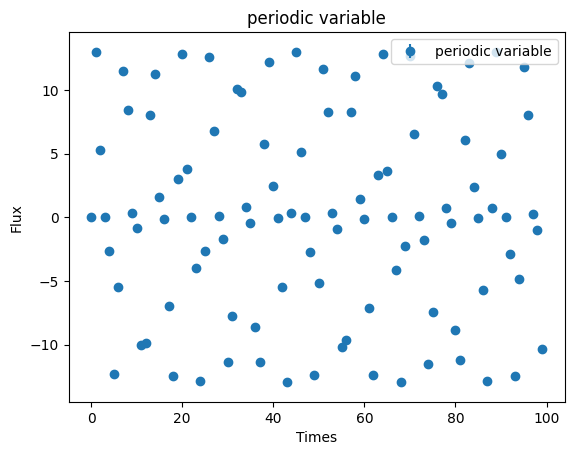

In [19]:
from scipy.fft import fft, fftfreq

# Define the object
class LightCurve:
    """Container for astrophysical light curves"""
    def __init__(self, times=None, fluxes=None,
                 uncertainties=None, flags=None, name=None):
      """
      Parameters
      ----------
      times : array-like
          Time of each flux measurement
      fluxes : array-like
          Fluxes at each time
      uncertainties : array-like
          Uncertainties of each flux measurement
      flags : array-like
          Data quality flags for each flux
      name : string
          Name of the target
      """
      self.times = times
      self.fluxes = fluxes
      self.uncertainties = uncertainties
      self.flags = flags
      self.name = name

    def plot(self, format='png'):
      """
      Plot the light curve.

      Parameters
      ----------
      format : str
          Format for saving the plot.
      """
      plt.errorbar(self.times, self.fluxes, self.uncertainties,
                   fmt='o', label=f'{self.name}')
      plt.xlabel('Times')
      plt.ylabel('Flux')
      plt.title(self.name)
      plt.legend(loc='upper right')
      plt.show()
      #plt.savefig(f'file_name_{self.name}.{format}')

    @classmethod
    def from_txt(cls, path, name):
      """
      Load a light curve from a raw text file

      Parameters
      ----------
      path : str
          Path to the light curve text file
      name : str
          Name of the target
      """
      data = np.loadtxt(path)

      times = data[0, :]
      fluxes = data[1, :]
      uncertainties = data[2, :]
      flags = data[3, :]
      return cls(times=times, fluxes=fluxes,
                 uncertainties=uncertainties, flags=flags, name=name)

    def clean(self, order=1):
      """
      Normalize the light curve by a polynomial.

      Parameters
      ----------
      order : int
          Polynomial order
      """
      # Fit a polynomial trend to the light curve
      poly_params = np.polyfit(self.times, self.fluxes, order)
      best_fit_model = np.polyval(poly_params, self.times)

      # Normalize each flux by the flux in the best-fit polynomial model
      self.fluxes /= best_fit_model
      self.uncertainties /= best_fit_model

      # Change the "cleaned" attribute to True
      self.cleaned = True

    def power_spectrum(self):
      """
      Estimate the power spectrum of the light curve.
      """
      # Compute time-series length and samples
      self.n_samples = self.times.shape[0]
      self.t_total = self.times[-1] - self.times[0]

      # Check if times-series is evenly-sampled
      diff_times = np.diff(self.times)
      if all(ele == diff_times[0] for ele in diff_times):
          fourier = fft(self.fluxes)
          self.power = 2.0/self.n_samples * np.abs(
              fourier[0:self.n_samples//2])
          self.freqs = fftfreq(self.n_samples,
                               self.t_total)[0:self.n_samples//2]


# Create a mock periodic light curve
# A sin(theta)
# theta = 2 * pi * f * t
times = np.arange(100)
fluxes = 10*np.sin(times) + 5*np.sin(2*times)

# Initialize a LightCurve object
periodic_lc = LightCurve(times=times, fluxes=fluxes,
                         uncertainties=uncertainties, flags=flags,
                         name='periodic variable')

periodic_lc.plot()


Text(0, 0.5, 'Power Spectrum Density')

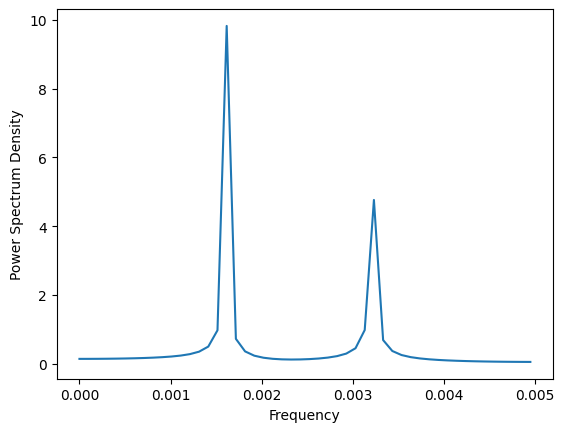

In [20]:
periodic_lc.power_spectrum()
plt.plot(periodic_lc.freqs, periodic_lc.power)
plt.xlabel('Frequency')
plt.ylabel('Power Spectrum Density')

## Exercise

The above example is relevant to my research interests, but you might have a very different idea about what objects you'd like to create for your work.

In the cell below, start designing an object that you could use in your day-to-day work – replace the placeholder text down there as you see fit. I don't anticipate that you'll "finish" developing this object in the short time that we have, but use this time to take advantage of the instructors and your peers in the room to ask for feedback/help in designing your object. Experiment, and run with your ideas!

In [21]:
class MyObject:
    """Don't forget to write docstrings!"""
    def __init__(self, arg1):
        self.arg1 = arg1